# Tutorial 9: Lattice constants of LiCoO2 and CoO2

## Import libraries

In [1]:
import siman #program package to manage DFT calculations https://github.com/dimonaks/siman
from siman.calc_manage import smart_structure_read, get_structure_from_matproj
from siman.calc_manage import add, res
from siman.set_functions import read_vasp_sets
from siman.database import write_database, read_database
from siman.header import db
read_database() # read saved database if available
import project_sets # should be after read_database
varset = read_vasp_sets(project_sets.user_vasp_sets, override_global = 0) #read user sets


%matplotlib inline

/home/t.goryacheva/simanrc.py was read


In [2]:
from IPython.display import display, Math
import warnings
warnings.filterwarnings('ignore')

# Hubbard correction 

Takes into account the strong localization of Co d-electrons

In [3]:
dftu_packet = { 'ISTART'   :1,   'ICHARG':1,  'LDAUTYPE':2, 'LASPH':'.TRUE.', 
                'LDAUPRINT':2, 'LMAXMIX' :4, 'LDAU' :'.TRUE.', "KSPACING": 0.7,
                'LDAUL':{'Co':2  , },
                'LDAUU':{'Co':3.4, },
                'LDAUJ':{'Co':0.0, },
                'GGA_COMPAT': '.FALSE.', 'ISPIN':2, 'LORBIT':11, 
                'magnetic_moments':{'Co':0 }} 

In [4]:
varset = read_vasp_sets([('u_ion_relax_opt', 'ion_relax_opt', dftu_packet, 'over')])#new set for DFT+U calculations


Attention! You have chosen to override set u_ion_relax_opt
 



## Get LiCoO2 structure file from Materials Project

In [5]:
st_LiCoO2 = get_structure_from_matproj(mat_proj_id = 'mp-22526') # primitive cell
st_LiCoO2.printme()

Structure mp-22526 downloaded from materialsproject.org
 File mp-22526.POSCAR was written 

Full Formula (Li1 Co1 O2)
Reduced Formula: LiCoO2
abc   :   4.992713   4.992713   4.992713
angles:  33.082406  33.082406  33.082398
Sites (4)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0         0         0
  1  Co    0.5       0.5       0.5
  2  O     0.760413  0.760413  0.760413
  3  O     0.239587  0.239587  0.239587


In [6]:
st_LiCoO2_conv = st_LiCoO2.get_conventional_cell() # return conventional cell 
st_LiCoO2_conv.update_xred() # it's just a technical feature
st_LiCoO2_conv.printme()  # compare conventional structure with primitive from previous strings

Full Formula (Li3 Co3 O6)
Reduced Formula: LiCoO2
abc   :   2.842898   2.842898  14.145615
angles:  90.000000  90.000000 120.000000
Sites (12)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0         0         0
  1  Li    0.666667  0.333333  0.333333
  2  Li    0.333333  0.666667  0.666667
  3  Co    0.333333  0.666667  0.166667
  4  Co    1         1         0.5
  5  Co    0.666667  0.333333  0.833333
  6  O     0         0         0.239587
  7  O     0.666667  0.333333  0.093746
  8  O     0.666667  0.333333  0.57292
  9  O     0.333333  0.666667  0.42708
 10  O     0.333333  0.666667  0.906254
 11  O     0         0         0.760413


## LiCoO2 structure optimization

In [7]:
add('LiCoO2', 'u_ion_relax_opt', 1, input_st = st_LiCoO2_conv, it_folder = 'LiCoO2/',  
    calc_method = 'uniform_scale', scale_region = (-5, 5), n_scale_images = 5, run = 0)

-- Attention!, cluster None is not found, using default raz 

-- add_loop_scale(): Preparing   scale  calculation ...  

-- File xyz/mp-22526_from_pmg_used_for_scaling.xyz was written 

-- Scale_region is (-5, 5) 

-- Scales are [-5.  -2.5  0.   2.5  5. ] 

-- Warning! File ./LiCoO2//LiCoO2.su/LiCoO2.su.auto_created_scaled_image.1.geo was replaced 

-- File xyz/LiCoO2.su.1.xyz was written 

-- Warning! File ./LiCoO2//LiCoO2.su/LiCoO2.su.auto_created_scaled_image.2.geo was replaced 

-- File xyz/LiCoO2.su.2.xyz was written 

-- Warning! File ./LiCoO2//LiCoO2.su/LiCoO2.su.auto_created_scaled_image.3.geo was replaced 

-- File xyz/LiCoO2.su.3.xyz was written 

-- Warning! File ./LiCoO2//LiCoO2.su/LiCoO2.su.auto_created_scaled_image.4.geo was replaced 

-- File xyz/LiCoO2.su.4.xyz was written 

-- Warning! File ./LiCoO2//LiCoO2.su/LiCoO2.su.auto_created_scaled_image.5.geo was replaced 

-- File xyz/LiCoO2.su.5.xyz was written 

-- 5 scale images have been created. 

--                     

'LiCoO2.su'

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['LiCoO2.su.u_ion_relax_opt.1']|LiCoO2.su.u_ion_relax_opt.1|  -68.3748  |2.70, 2.70, 13.44|-18183,-18183,-26522 |   4, 8, 34    
-- db['LiCoO2.su.u_ion_relax_opt.2']|LiCoO2.su.u_ion_relax_opt.2|  -69.2862  |2.77, 2.77, 13.79|-33987,-33987,-37484 |   3, 7, 23    
-- db['LiCoO2.su.u_ion_relax_opt.3']|LiCoO2.su.u_ion_relax_opt.3|  -69.5340  |2.84, 2.84, 14.15|-45662,-45662,-44820 |   2, 9, 19    
-- db['LiCoO2.su.u_ion_relax_opt.4']|LiCoO2.su.u_ion_relax_opt.4|  -69.2391  |2.91, 2.91, 14.50|-53832,-53832,-49103 |   3,10, 30    
-- db['LiCoO2.su.u_ion_relax_opt.5']|LiCoO2.su.u_ion_relax_opt.5|  -68.5661  |2.98, 2.98, 14.85|-57872,-57872,-51087 |   3,10, 32    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-- db['LiCoO2.su.u_ion_relax_opt.100']|LiCoO2.su.u_ion_relax_opt.100|  -69.5341  |2.84, 2.84, 14.12|-45169,-45169,-44790 |   2, 9, 19    
alpha, energy: 90.00, -68.375
alpha, energy: 90.00, -69.286
alpha, energy: 90.00, -69.534
alpha, energy: 90.00, -69.239
alpha, energy: 90.00, -68.566
alpha, energy: 90.00, -69.534
-- Image saved to  figs/angle.eps 


            v0 = 98.35011282020322 A^3
            a0 = 4.615920150578743 A
            E0 = -69.53107632172504 eV
            B  = 0.9579513885490931 eV/A^3 



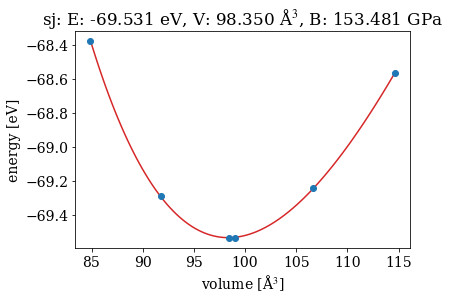

-- fit results are saved in  figs/LiCoO2.su.u_ion_relax_opt.100.png 



(["db['LiCoO2.su.u_ion_relax_opt.100']|LiCoO2.su.u_ion_relax_opt.100|  -69.5341  |2.84, 2.84, 14.12|-45169,-45169,-44790 |   2, 9, 19   "],
 [])

In [14]:
res('LiCoO2.su', 'u_ion_relax_opt', list(range(1,6))+[100], show = 'fit', analys_type = 'fit_a')

In [9]:
db['LiCoO2.su.u_ion_relax_opt.100'] # calculation object of LiCoO2 optimized structure

## Get CoO2 structure by LiCoO2 deintercalation


In [10]:
from siman.geo import create_deintercalated_structure # I hope it's clear what the imported function do

In [11]:
st_CoO2 = create_deintercalated_structure(st_LiCoO2_conv, 'Li') # this means to remove all the Li atoms
st_CoO2.printme()

-- I have found  1 non-equivalent positions for Li : dict_keys([0]) 
-- Atom numbers (from zero!):  {0: [0, 1, 2]} 

-- Choose from the following list using *del_pos* starting from 1: 
--       1 ---> 0 
-- You have chosen position: 0 

Full Formula (Co3 O6)
Reduced Formula: CoO2
abc   :   2.842898   2.842898  14.145615
angles:  90.000000  90.000000 120.000000
Sites (9)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Co    0.333333  0.666667  0.166667
  1  Co    1         1         0.5
  2  Co    0.666667  0.333333  0.833333
  3  O     0         0         0.239587
  4  O     0.666667  0.333333  0.093746
  5  O     0.666667  0.333333  0.57292
  6  O     0.333333  0.666667  0.42708
  7  O     0.333333  0.666667  0.906254
  8  O     0         0         0.760413


## CoO2 structure optimization


In [24]:
add('CoO2', 'u_ion_relax_opt', 1, input_st = st_CoO2, it_folder = 'CoO2/',  
    calc_method = 'uniform_scale', scale_region = (-5, 5), n_scale_images = 5, up="up2", run = 0)

-- Attention!, cluster None is not found, using default raz 

-- add_loop_scale(): Preparing   scale  calculation ...  

-- File xyz/mp-22526_from_pmg.Li[0, 1, 2]del_used_for_scaling.xyz was written 

-- Scale_region is (-5, 5) 

-- Scales are [-5.  -2.5  0.   2.5  5. ] 

-- Warning! File ./CoO2//CoO2.su/CoO2.su.auto_created_scaled_image.1.geo was replaced 

-- File xyz/CoO2.su.1.xyz was written 

-- Warning! File ./CoO2//CoO2.su/CoO2.su.auto_created_scaled_image.2.geo was replaced 

-- File xyz/CoO2.su.2.xyz was written 

-- Warning! File ./CoO2//CoO2.su/CoO2.su.auto_created_scaled_image.3.geo was replaced 

-- File xyz/CoO2.su.3.xyz was written 

-- Warning! File ./CoO2//CoO2.su/CoO2.su.auto_created_scaled_image.4.geo was replaced 

-- File xyz/CoO2.su.4.xyz was written 

-- Warning! File ./CoO2//CoO2.su/CoO2.su.auto_created_scaled_image.5.geo was replaced 

-- File xyz/CoO2.su.5.xyz was written 

-- 5 scale images have been created. 

-- check_kpoints(): Kpoint   mesh is:  [4, 4, 1]

'CoO2.su'

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['CoO2.su.u_ion_relax_opt.1']|CoO2.su.u_ion_relax_opt.1|  -51.6133  |2.70, 2.70, 13.44|-31256,-31256,-47880 |   2,13, 26    
-- db['CoO2.su.u_ion_relax_opt.2']|CoO2.su.u_ion_relax_opt.2|  -52.1919  |2.77, 2.77, 13.79|-38681,-38681,-45782 |   3, 8, 26    
-- db['CoO2.su.u_ion_relax_opt.3']|CoO2.su.u_ion_relax_opt.3|  -52.3295  |2.84, 2.84, 14.15|-45868,-45868,-45397 |   4, 9, 36    
-- db['CoO2.su.u_ion_relax_opt.4']|CoO2.su.u_ion_relax_opt.4|  -52.2064  |2.91, 2.91, 14.50|-50146,-50146,-42403 |   4,11, 44    
-- db['CoO2.su.u_ion_relax_opt.5']|CoO2.su.u_ion_relax_opt.5|  -51.9030  |2.98, 2.98, 14.85|-51533,-51533,-40237 |   5,11, 56    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-- db['CoO2.su.u_ion_relax_opt.100']|CoO2.su.u_ion_relax_opt.100|  -52.3477  |2.84, 2.84, 14.13|-45493,-45493,-45520 |   2,11, 23    
alpha, energy: 90.00, -51.613
alpha, energy: 90.00, -52.192
alpha, energy: 90.00, -52.330
alpha, energy: 90.00, -52.206
alpha, energy: 90.00, -51.903
alpha, energy: 90.00, -52.348
-- Image saved to  figs/angle.eps 


            v0 = 98.62613525722155 A^3
            a0 = 4.62023435492817 A
            E0 = -52.339567126029806 eV
            B  = 0.5146057094852647 eV/A^3 



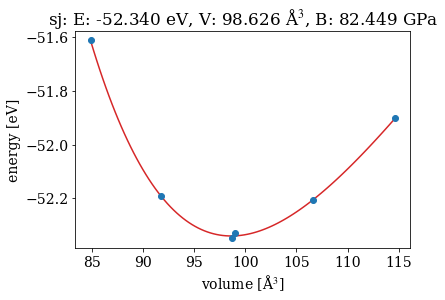

-- fit results are saved in  figs/CoO2.su.u_ion_relax_opt.100.png 



(["db['CoO2.su.u_ion_relax_opt.100']|CoO2.su.u_ion_relax_opt.100|  -52.3477  |2.84, 2.84, 14.13|-45493,-45493,-45520 |   2,11, 23   "],
 [])

In [25]:
res('CoO2.su', 'u_ion_relax_opt', list(range(1,6))+[100], show = 'fit', analys_type = 'fit_a')

In [26]:
db['CoO2.su.u_ion_relax_opt.100'] # calculation object of CoO2 optimized structure

In [27]:
write_database()


Database has been successfully updated



## Redox potential calculation

The equation for deintercalation potential you can find in *Aksyonov, D. A., Fedotov, S. S., Stevenson, K. J., & Zhugayevych, A. (2018). Understanding migration barriers for monovalent ion insertion in transition metal oxide and phosphate based cathode materials: a DFT study. Computational Materials Science, 154, 449-458.*

In [15]:
from siman.analysis import calc_redox # import function which allows to calculate redox potential

In [20]:
LiCoO2_u = db['LiCoO2.su.u_ion_relax_opt.100']
CoO2_u = db['CoO2.su.u_ion_relax_opt.100']
calc_redox(LiCoO2_u, CoO2_u)

-- LiCoO2.su.u_ion_relax_opt.100                 | CoO2.su.u_ion_relax_opt.100    |       3.83 V |       -0.3 % | -69.53| -52.35|      5|      2 |   0 


{'is': 'LiCoO2.su',
 'redox_pot': 3.8287920399999984,
 'id_is': ('LiCoO2.su', 'u_ion_relax_opt', 100),
 'id_ds': ('CoO2.su', 'u_ion_relax_opt', 100),
 'kspacing': 0.7,
 'time': 0.18713583333333333,
 'mdstep': 2,
 'ecut': 300,
 'niter': 9.5,
 'set_is': 'u_ion_relax_opt',
 'vol_red': -0.3049090354710888}

## Compare with experimental data
Ceder, G., Van der Ven, A., & Aydinol, M. K. (1998). Lithium-intercalation oxides for rechargeable batteries. JOM, 50(9), 35-40. https://link.springer.com/article/10.1007/s11837-998-0412-5 


# Volume change after extraction of Li ions

In [22]:
print(r"Volume change is {:1.3f} A^3".format(CoO2_u.end.get_volume() - LiCoO2_u.end.get_volume()))

Volume change is -0.879 A^3
